In [51]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import blimpy as bl
import pandas as pd
from astropy import units as u

import sys, os, glob, errno
import csv
import json
import h5py
import time
from astropy.stats import sigma_clip


from scipy.signal import butter, lfilter, filtfilt
import scipy.signal

sys.path.insert(0, "/home/bryanb/setigen/")
import setigen as stg

def db(x):
    """ Convert linear value to dB value """
    return 10*np.log10(x)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise_from_obs()
frame.noise_mean, frame.noise_std

(5526876.3968003495, 547242.308462764)

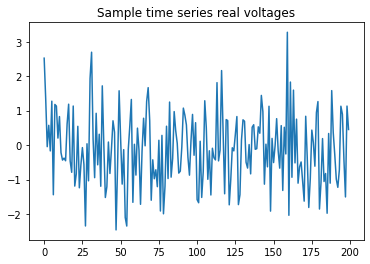

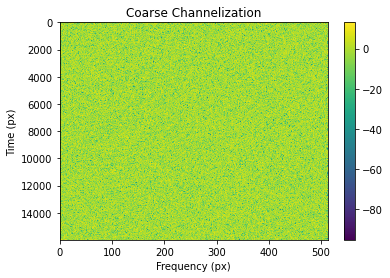

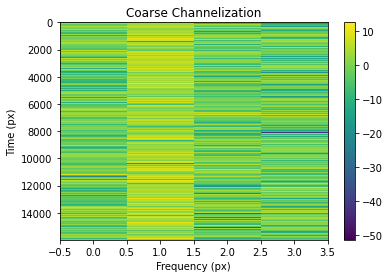

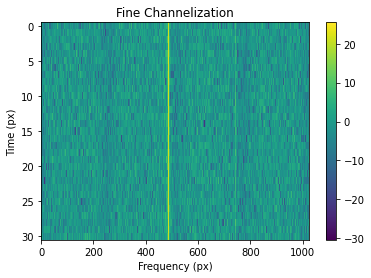

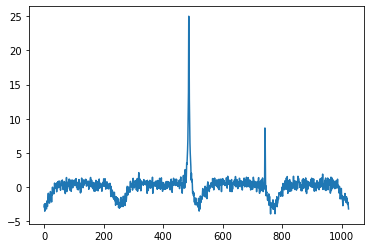

In [53]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(sample_rate=3e9)
stream.add_noise(v_mean=0, 
                 v_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.4))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=0.1)
stream.get_samples(num_samples=M*P*W)

plt.plot(stream.v[:200])
plt.title("Sample time series real voltages")
plt.show()


pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.v,
                                                    M,
                                                    P)

plt.imshow(db(np.abs(pfb_voltages)**2), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Coarse Channelization")
plt.show()

plt.imshow(db(np.abs(pfb_voltages[:, 203:207])**2), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Coarse Channelization")
plt.show()

XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

In [41]:
pfb_voltages.shape

(15993, 513)

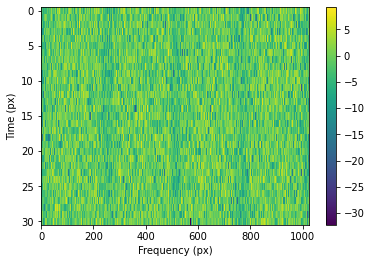

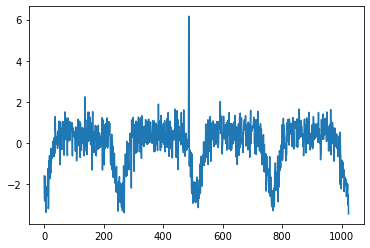

In [408]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.4))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=0.01)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)

XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

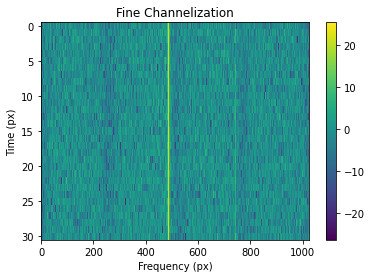

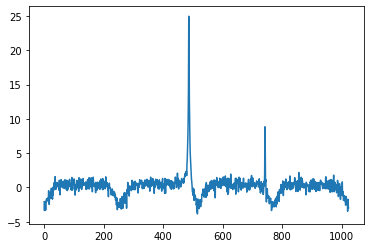

In [409]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.4))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=0.1)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)

XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

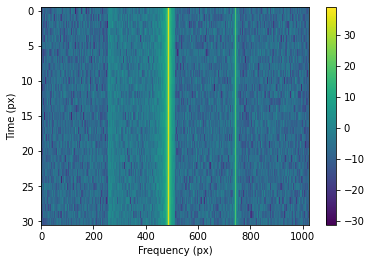

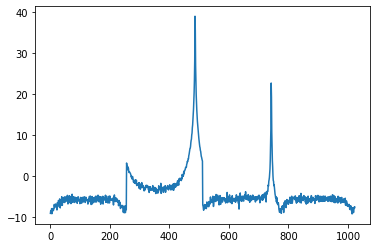

In [13]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.4))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=1)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

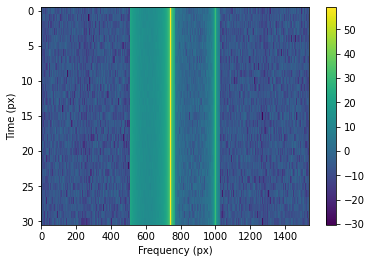

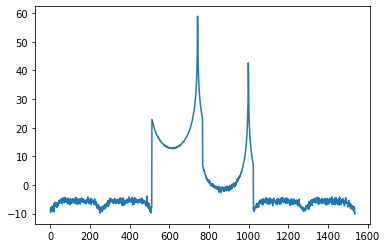

In [22]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.4))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=10)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=202,
                                               num_channels=6)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

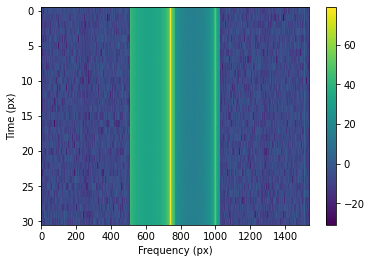

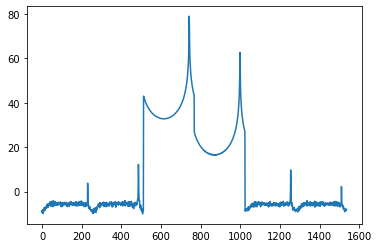

In [23]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.4))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=100)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=202,
                                               num_channels=6)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

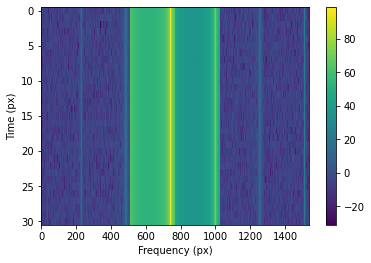

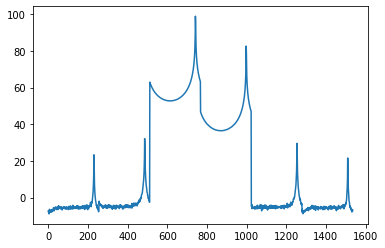

In [24]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.4))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=1000)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=202,
                                               num_channels=6)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

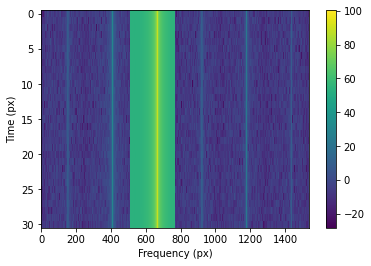

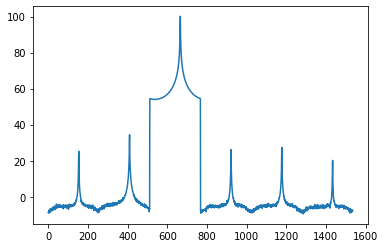

In [25]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.1))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=1000)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=202,
                                               num_channels=6)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

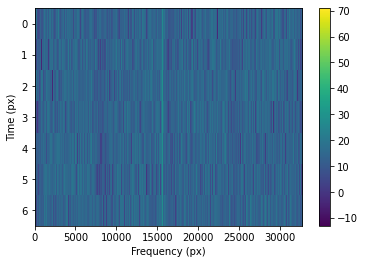

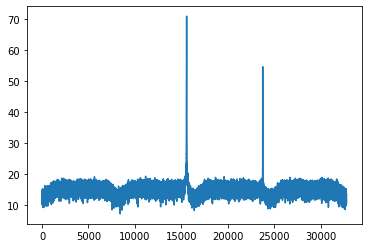

In [27]:
M     = 8        # Number of taps
P     = 256       # Number of 'branches', also fft length
W     = 16000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (11.4))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=1)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=2**13,
                                               start_channel=10,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

0.0001281742271531007 0.0010280257870710367


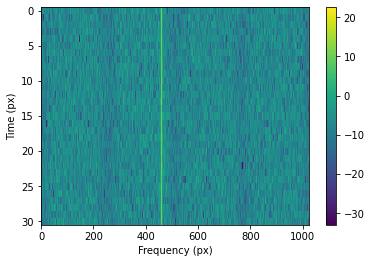

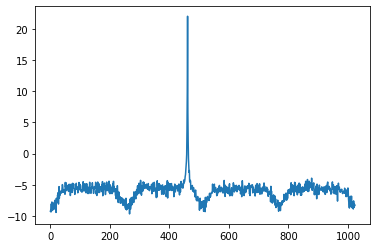

In [173]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.3))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=0.1)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

0.0001281742271531007 0.0010280257870710367


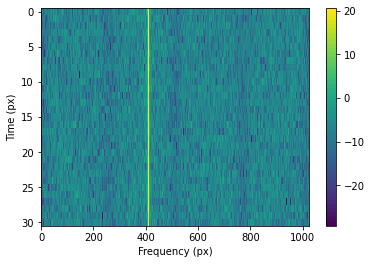

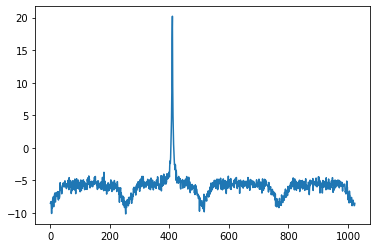

In [175]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.1))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=0.1)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

0.0001281742271531007 0.0010280257870710367


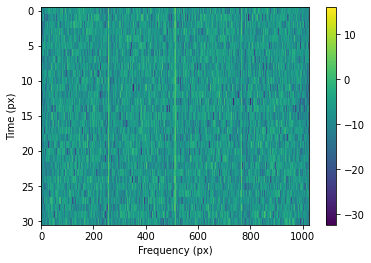

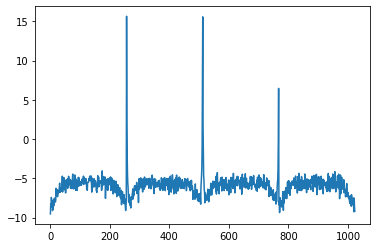

In [177]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.499))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=0.1)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

0.0001281742271531007 0.0010280257870710367


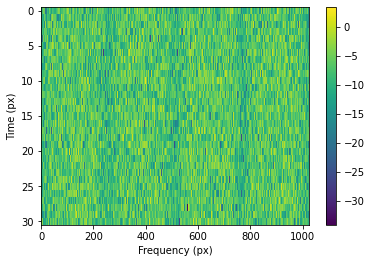

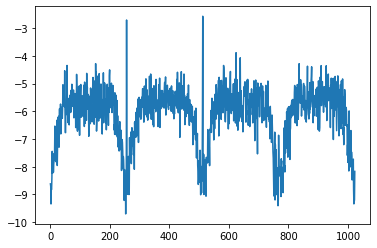

In [178]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.499))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=0.01)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

0.0001281742271531007 0.0010280257870710367
3.9993880653311815 4.0058440091969265


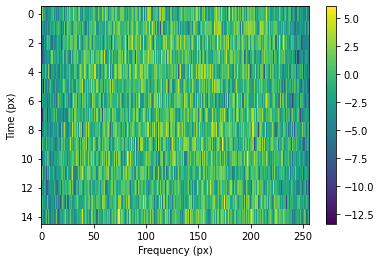

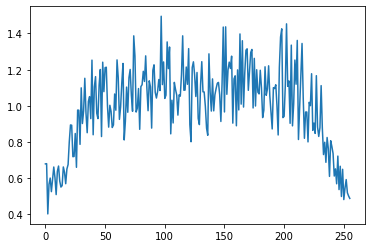

In [172]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 4         # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=2)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
# stream.add_signal(f_start=(sample_rate/P * (204.1))*u.Hz, 
#                   drift_rate=0*u.Hz/u.s, 
#                   level=0.1)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
print(np.mean(np.abs(pfb_voltages)**2)*P, np.std(np.abs(pfb_voltages)**2)*P)

fftlength = 256
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=fftlength,
                                               start_channel=204,
                                               num_channels=1) 
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot((np.mean(XX_psd, axis=0)))
plt.show()

In [167]:
(1/(0.00390670347613493))

255.9702844376976

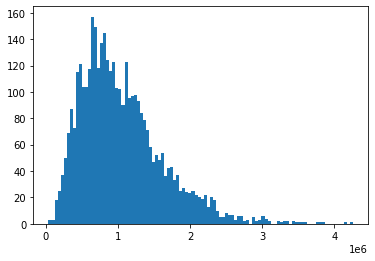

In [123]:
plt.hist(XX_psd.flatten(), bins=100)

plt.show()

In [124]:
np.mean(XX_psd), np.var(XX_psd)

(1047811.5141964001, 327440229519.57434)

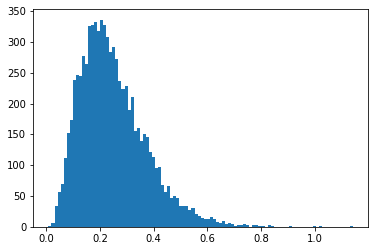

(0.2488779107048795, 0.015494186730657354)

In [116]:
df = 8
d = (np.random.chisquare(df, size=7936)) / df / 4 
plt.hist(d, bins=100)
plt.show()

np.mean(d), np.var(d)

1.0005688826394459 1.0022185112350976


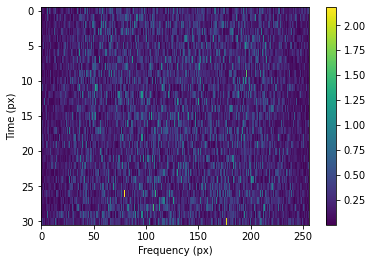

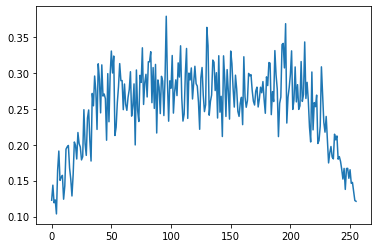

0.05513390322864098
0.37905866830755536


2.2995813801690503

In [300]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2         # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
# stream.add_signal(f_start=(sample_rate/P * (204.1))*u.Hz, 
#                   drift_rate=0*u.Hz/u.s, 
#                   level=0.1)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)
print(np.mean(np.abs(pfb_voltages)**2)*P, np.std(np.abs(pfb_voltages)**2)*P)

fftlength = 256
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=fftlength,
                                               start_channel=204,
                                               num_channels=1) 
plt.imshow((XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot((np.mean(XX_psd, axis=0)))
plt.show()


clipped_data = sigma_clip(np.mean(XX_psd, axis=0),
                          sigma=3,
                          maxiters=5,
                          masked=False)
clipped_data = np.mean(XX_psd, axis=0)


# Estimate SNR
print(np.std(clipped_data))
print(np.max((np.mean(XX_psd, axis=0))))
(np.max((np.mean(XX_psd, axis=0))) - np.mean(clipped_data)) / np.std(clipped_data)

9.010045165660863 9.02621360742319
2.126780670774176 2.1182183620881267


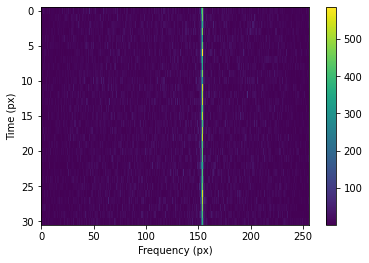

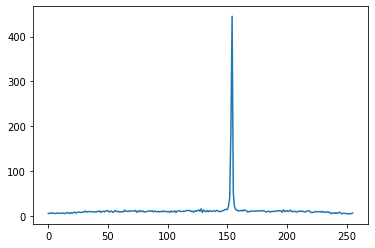

8.324723635704148 5.361420173825657
0.9629394896124012
445.3098312357678


81.50547680135497

In [366]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2         # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=3)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.1))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=0.1)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P) 
print(np.mean(np.abs(pfb_voltages)**2), np.std(np.abs(pfb_voltages)**2))
print(np.std(np.real(pfb_voltages)), np.std(np.imag(pfb_voltages)))


fftlength = 256 
XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=fftlength,
                                               start_channel=204,
                                               num_channels=1) 
plt.imshow((XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.show()

plt.plot((np.mean(XX_psd, axis=0)))
plt.show()


clipped_data = sigma_clip(XX_psd,
                          sigma=3,
                          maxiters=5,
                          masked=False)
# clipped_data = XX_psd

# Estimate SNR
print(np.mean(clipped_data), np.std(clipped_data))
print(np.std(clipped_data)/np.sqrt(XX_psd.shape[0]))

print(np.max((np.mean(XX_psd, axis=0))))
(np.max((np.mean(XX_psd, axis=0))) - np.mean(clipped_data)) / np.std(clipped_data)

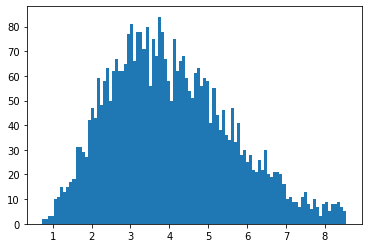

In [358]:
plt.hist(clipped_data, bins=100)
plt.show()

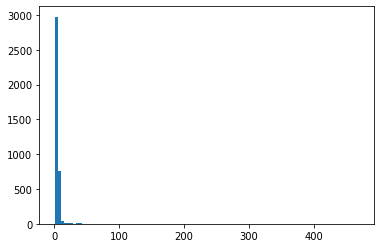

In [359]:
plt.hist(XX_psd.flatten(), bins=100)
plt.show()

In [249]:
0.1 / 1 * np.sqrt(M*P*W)*fftlength/P*16

3238.1723240124206

In [221]:
1200*2**0.5

1697.0562748477141

In [181]:
M*P*W

16384000

In [182]:
np.max((np.mean(XX_psd, axis=0)))

103.96654286115444

In [183]:
np.mean((np.mean(XX_psd, axis=0)))

0.9643984467561506

In [186]:
clipped_data = sigma_clip(np.mean(XX_psd, axis=0),
                          sigma=3,
                          maxiters=5,
                          masked=False)
np.mean(clipped_data), np.std(clipped_data)

(0.2636022641081644, 0.06434778276288347)

In [189]:
np.max((np.mean(XX_psd, axis=0))) / np.std(clipped_data)

1615.6973620095503

In [275]:
import pandas as pd
df = pd.DataFrame(columns=('P', 'W', 'fftlength', 'int_noise_mean', 'signal_peak', 'SNR'))
df

,P,W,fftlength,int_noise_mean,signal_peak,SNR


In [334]:
df = pd.DataFrame(columns=('P', 'W', 'fftlength', 'int_noise_mean', 'signal_peak', 'SNR'))

M     = 8        # Number of taps
sample_rate = 3e9

for P in [512, 1024]:
    for W in [1000, 2000]:
            for fftlength in [128, 256]:
                int_noise_mean = []
                signal_peak = []
                snr = []
                for i in range(4):

                    stream = stg.voltage.DataStream(num_samples=M*P*W,
                                                    sample_rate=3e9)
                    stream.add_noise(x_mean=0, 
                                     x_std=1)
                    stream.add_signal(f_start=(sample_rate/P * (204.1))*u.Hz, 
                                      drift_rate=0*u.Hz/u.s, 
                                      level=0.1)

                    pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                                        M,
                                                                        P)

                    XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                                                   n_int=n_int,
                                                                   fftlength=fftlength,
                                                                   start_channel=204,
                                                                   num_channels=1) 

                    clipped_data = sigma_clip(np.mean(XX_psd, axis=0),
                                              sigma=3,
                                              maxiters=5,
                                              masked=False)

                    int_noise_mean.append(np.std(clipped_data))
                    signal_peak.append(np.max((np.mean(XX_psd, axis=0))))

                    # Estimate SNR
                    temp_snr = (np.max((np.mean(XX_psd, axis=0))) - np.mean(clipped_data)) / np.std(clipped_data)
                    snr.append(temp_snr)

                df.loc[len(df)] = [P, 
                                   W, 
                                   fftlength, 
                                   np.mean(int_noise_mean), 
                                   np.mean(signal_peak), 
                                   np.mean(snr)]
df

,P,W,fftlength,int_noise_mean,signal_peak,SNR
0,512.0,1000.0,128.0,0.254128,160.910024,629.954075
1,512.0,1000.0,256.0,0.292595,208.277786,709.185220
2,512.0,2000.0,128.0,0.237741,159.379819,666.434334
3,512.0,2000.0,256.0,0.253311,208.889736,821.711464
4,1024.0,1000.0,128.0,0.274568,321.452151,1169.033315
5,1024.0,1000.0,256.0,0.299969,417.007666,1387.907863
6,1024.0,2000.0,128.0,0.242595,318.537316,1309.511727
7,1024.0,2000.0,256.0,0.274700,418.730946,1520.909128


In [280]:
df = pd.DataFrame(columns=('P', 'W', 'fftlength', 'int_noise_mean', 'signal_peak', 'SNR'))
df = pd.DataFrame(columns=( 'W',  'int_noise_mean', 'signal_peak', 'SNR'))


M     = 8        # Number of taps
sample_rate = 3e9

for P in [1024]:
    for W in [500, 1000, 2000, 4000]:
            for fftlength in [256]:
                int_noise_mean = []
                signal_peak = []
                snr = []
                for i in range(4):

                    stream = stg.voltage.DataStream(num_samples=M*P*W,
                                                    sample_rate=3e9)
                    stream.add_noise(x_mean=0, 
                                     x_std=1)
                    stream.add_signal(f_start=(sample_rate/P * (204.1))*u.Hz, 
                                      drift_rate=0*u.Hz/u.s, 
                                      level=0.1)

                    pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                                        M,
                                                                        P)

                    XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                                                   n_int=n_int,
                                                                   fftlength=fftlength,
                                                                   start_channel=204,
                                                                   num_channels=1) 

                    clipped_data = sigma_clip(np.mean(XX_psd, axis=0),
                                              sigma=3,
                                              maxiters=5,
                                              masked=False)

                    int_noise_mean.append(np.std(clipped_data))
                    signal_peak.append(np.max((np.mean(XX_psd, axis=0))))

                    # Estimate SNR
                    temp_snr = (np.max((np.mean(XX_psd, axis=0))) - np.mean(clipped_data)) / np.std(clipped_data)
                    snr.append(temp_snr)

                df.loc[len(df)] = [W, 
                                   np.mean(int_noise_mean), 
                                   np.mean(signal_peak), 
                                   np.mean(snr)]
df

,W,int_noise_mean,signal_peak,SNR
0,500.0,0.092144,104.947047,1136.591118
1,1000.0,0.075505,103.289454,1366.216613
2,2000.0,0.067792,105.133405,1550.960330
3,4000.0,0.065786,104.192104,1580.571017


In [281]:
1366.216613/1136.591118

1.2020299924603142

In [282]:
1550.960330/1366.216613

1.1352228594222196

In [283]:
1580.571017/1550.960330

1.0190918403438467

In [326]:
window = scipy.signal.get_window('hamming', M * P)
sinc = scipy.signal.firwin(M * P, 
                           cutoff=1.0 / P,
                           window='rectangular')

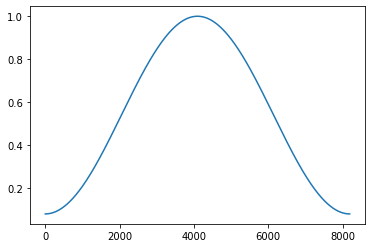

In [327]:
plt.plot(window)
plt.show()

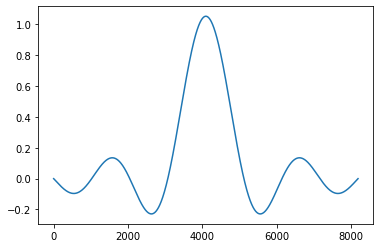

In [328]:
plt.plot(sinc)
plt.show()

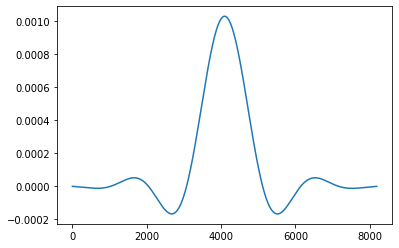

In [311]:
plt.plot(window * sinc)
plt.show()

In [378]:
pfb_voltages.shape

(15992, 513)

In [380]:
np.real(pfb_voltages).shape

(15992, 513)

[]

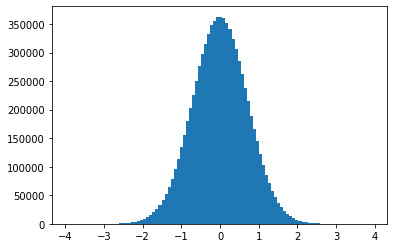

In [390]:
plt.hist(np.real(pfb_voltages.flatten()), bins=100)
plt.plot()

[]

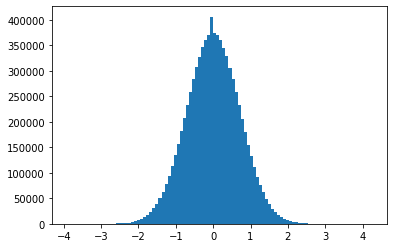

In [391]:
plt.hist(np.imag(pfb_voltages.flatten()), bins=100)
plt.plot()

In [396]:
np.std(pfb_voltages.flatten()),   np.std(pfb_voltages.flatten()[:10000])


(1.00242055276114, 1.0056398301122926)

0.7173256164015064
0.7048280784878759


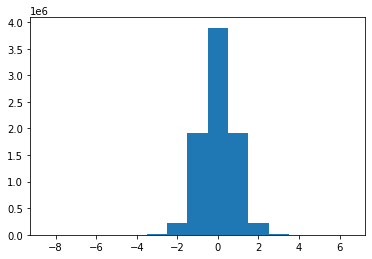

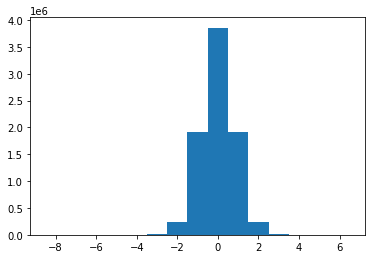

In [431]:
def map_to_bytes(pfb_voltages, target_fwhm=30, n_bits=8):
    # Estimate sigma quickly
    data_sigma = np.std(pfb_voltages.flatten()[:10000])
    data_fwhm = 2 * np.sqrt(2 * np.log(2)) * data_sigma
    print(data_sigma)
    
    factor = target_fwhm / data_fwhm
    
    new_voltages = np.round(factor * pfb_voltages)
    new_voltages[new_voltages < -2**(n_bits - 1)] = -2**(n_bits - 1)
    new_voltages[new_voltages > 2**(n_bits - 1) - 1] = 2**(n_bits - 1) - 1
    new_voltages = new_voltages.astype(int)
    return new_voltages


n_bits = 4
target_fwhm = 30 * 2**n_bits / 2**8

mapped_voltages_r = map_to_bytes(np.real(pfb_voltages), target_fwhm, n_bits)
mapped_voltages_i = map_to_bytes(np.imag(pfb_voltages), target_fwhm, n_bits)

plt.hist(mapped_voltages_r.flatten(), bins=np.arange(2**n_bits) - 2**(n_bits - 1) - 0.5)
plt.plot()
plt.show()

plt.hist(mapped_voltages_i.flatten(), bins=np.arange(2**n_bits) - 2**(n_bits - 1) - 0.5)
plt.plot()
plt.show()

In [423]:
np.arange(16) - 8

array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7])

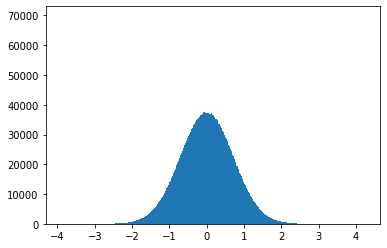

In [405]:
plt.hist(np.imag(pfb_voltages).flatten(), bins=1000)
plt.show()

In [402]:
mapped_voltages

array([[ 14,   3, -17, ..., -18,   3,   2],
       [ 27,  15,   8, ...,   9,  11, -24],
       [ 34,  19,  -2, ...,  -8, -15, -24],
       ...,
       [ 28, -18, -15, ..., -16,   7,   0],
       [-21, -15,   0, ..., -11,  21,   5],
       [ 23,  11,  -7, ...,   5,   0,  -4]])

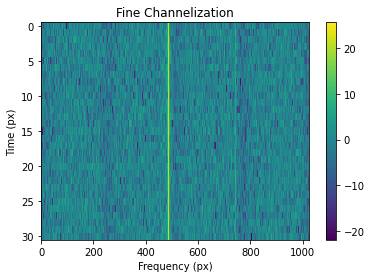

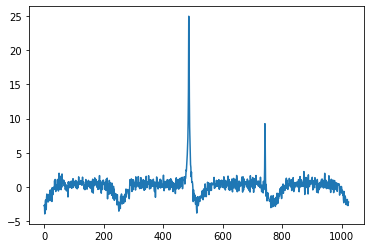

In [3]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(num_samples=M*P*W,
                                sample_rate=3e9)
stream.add_noise(x_mean=0, 
                 x_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.4))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=0.1)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(stream.y,
                                                    M,
                                                    P)

XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

In [4]:
pfb_voltages.shape

(15993, 513)

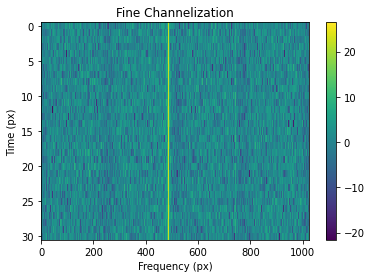

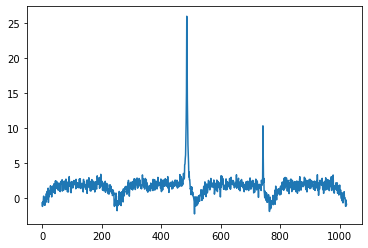

In [54]:
M     = 8        # Number of taps
P     = 1024       # Number of 'branches', also fft length
W     = 2000       # Number of windows of length M*P in input time stream
n_int = 2          # Number of time integrations on output data
sample_rate = 3e9

stream = stg.voltage.DataStream(sample_rate=3e9)
stream.add_noise(v_mean=0, 
                 v_std=1)
# stream.add_signal(f_start=0.598*u.GHz, 
#                   drift_rate=1e8*u.Hz/u.s, 
#                   level=1)
stream.add_signal(f_start=(sample_rate/P * (204.4))*u.Hz, 
                  drift_rate=0*u.Hz/u.s, 
                  level=0.1)
stream.get_samples(num_samples=M*P*W)

digitize_stream = stg.voltage.sigproc.quantize_real(stream.v,
                                                    target_fwhm=30,
                                                    n_bits=8)

pfb_voltages = stg.voltage.sigproc.get_pfb_voltages(digitize_stream,
                                                    M,
                                                    P)

# Perform quantization
n_bits = 4
target_fwhm = 30 * 2**n_bits / 2**8 
q_pfb_voltages = stg.voltage.sigproc.quantize_complex(pfb_voltages, 
                                                      target_fwhm=target_fwhm,
                                                      n_bits=n_bits)

# Here is where we would write to raw files!

XX_psd = stg.voltage.sigproc.get_pfb_waterfall(pfb_voltages=q_pfb_voltages,
                                               n_int=n_int,
                                               fftlength=256,
                                               start_channel=203,
                                               num_channels=4)
plt.imshow(db(XX_psd), 
           cmap='viridis', 
           aspect='auto', 
           interpolation='none')
plt.colorbar()
plt.xlabel("Frequency (px)")
plt.ylabel("Time (px)")
plt.title("Fine Channelization")
plt.show()

plt.plot(db(np.mean(XX_psd, axis=0)))
plt.show()

In [9]:
q_pfb_voltages

array([[ 1.+0.j,  1.+0.j,  0.+0.j, ...,  0.-1.j,  1.+0.j,  1.+0.j],
       [-1.+0.j,  0.-1.j,  0.+1.j, ..., -1.-1.j,  0.+0.j,  0.+0.j],
       [ 2.+0.j,  0.+0.j, -1.+1.j, ...,  1.-1.j,  0.+1.j,  2.+0.j],
       ...,
       [ 0.+0.j,  1.+0.j,  1.+0.j, ...,  1.-1.j,  1.-1.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j, ..., -1.+0.j, -1.+1.j,  0.+0.j],
       [ 2.+0.j, -2.-1.j,  0.+0.j, ...,  0.+0.j,  1.+0.j,  1.+0.j]])

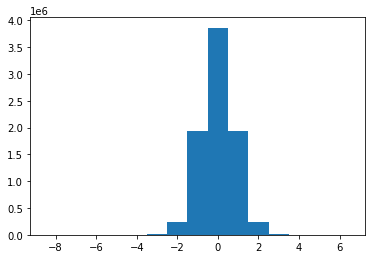

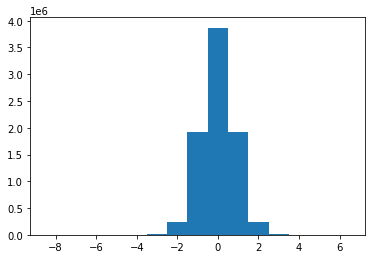

In [10]:
plt.hist(np.real(q_pfb_voltages).flatten(), bins=np.arange(2**n_bits) - 2**(n_bits - 1) - 0.5)
plt.plot()
plt.show()

plt.hist(np.imag(q_pfb_voltages).flatten(), bins=np.arange(2**n_bits) - 2**(n_bits - 1) - 0.5)
plt.plot()
plt.show()

In [29]:
np.std(np.real(pfb_voltages).flatten())
np.std(np.real(pfb_voltages).flatten())

0.7100304683976435

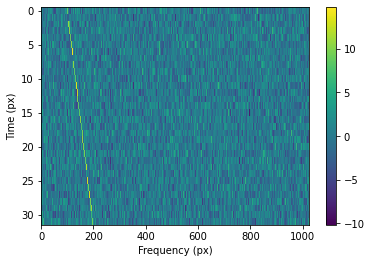

In [18]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=0, x_std=2, noise_type='gaussian')
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(100),
                                            drift_rate=frame.get_drift_rate(100, 200)),
                          stg.constant_t_profile(level=10),
                          stg.box_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

frame.render()

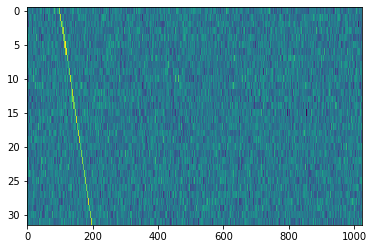

In [19]:
plt.imshow(frame.get_data(), interpolation='nearest', aspect='auto')

In [50]:
3 + np.zeros(5) + 2

array([5., 5., 5., 5., 5.])

array([6.00000000e+09, 6.00000000e+09, 6.00000001e+09, ...,
       6.00000285e+09, 6.00000286e+09, 6.00000286e+09])

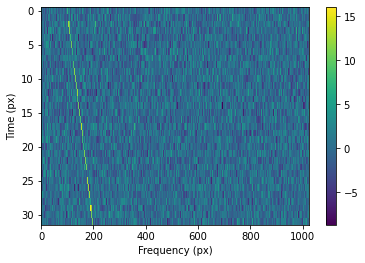

In [90]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6000*u.MHz,
                  ascending=True)
noise = frame.add_noise(x_mean=0, x_std=2, noise_type='gaussian')
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(100),
                                            drift_rate=frame.get_drift_rate(100, 200)),
                          stg.constant_t_profile(level=10),
                          stg.box_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

frame.render()
frame.fs

array([5.99999714e+09, 5.99999714e+09, 5.99999715e+09, ...,
       5.99999999e+09, 6.00000000e+09, 6.00000000e+09])

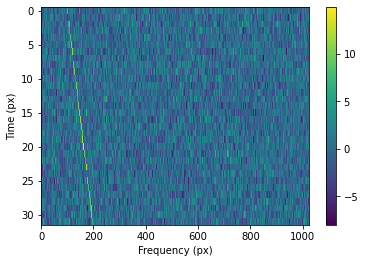

In [112]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6000*u.MHz,
                  ascending=False)
noise = frame.add_noise(x_mean=0, x_std=2, noise_type='gaussian')
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(100),
                                            drift_rate=frame.get_drift_rate(100, 200)),
                          stg.constant_t_profile(level=10),
                          stg.box_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

frame.render()
frame.fs

In [109]:
frame.get_index(6000*u.MHz)

1023

In [110]:
frame.get_drift_rate(100, 200)

0.4783244859745369

In [113]:
frame.save_fil('test.fil')
wf = bl.Waterfall('test.fil')
wf.header

blimpy.waterfall INFO     Conversion time: 0.00sec


{'machine_id': 20,
 'telescope_id': 6,
 'src_raj': <Angle 17.7875 hourangle>,
 'src_dej': <Angle -28.3831 deg>,
 'az_start': 0.0,
 'za_start': 0.0,
 'data_type': 1,
 'fch1': 6000.0,
 'foff': -2.7939677238464355e-06,
 'nchans': 1024,
 'nbeams': 1,
 'ibeam': -1,
 'nbits': 32,
 'tstart': 58465.717094907406,
 'tsamp': 18.25361108,
 'nifs': 1,
 'source_name': 'Synthetic',
 'rawdatafile': 'Synthetic'}

blimpy.waterfall INFO     Conversion time: 0.00sec


{'machine_id': 20,
 'telescope_id': 6,
 'src_raj': <Angle 17.7875 hourangle>,
 'src_dej': <Angle -28.3831 deg>,
 'az_start': 0.0,
 'za_start': 0.0,
 'data_type': 1,
 'fch1': 6000.0,
 'foff': 2.7939677238464355e-06,
 'nchans': 1024,
 'nbeams': 1,
 'ibeam': -1,
 'nbits': 32,
 'tstart': 58465.717094907406,
 'tsamp': 18.25361108,
 'nifs': 1,
 'source_name': 'Synthetic',
 'rawdatafile': 'Synthetic'}

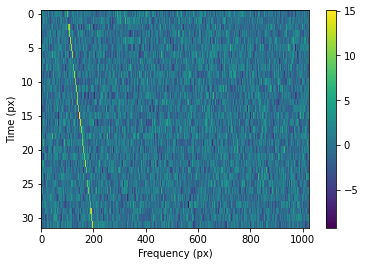

In [188]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6000*u.MHz,
                  ascending=True)
noise = frame.add_noise(x_mean=0, x_std=2, noise_type='gaussian')
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(100),
                                            drift_rate=frame.get_drift_rate(100, 200)),
                          stg.constant_t_profile(level=10),
                          stg.box_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

frame.render()
frame.save_fil('test.fil')
wf = bl.Waterfall('test.fil')
wf.header

In [189]:
frame.get_frequency(200)

6000000558.793545

blimpy.waterfall INFO     Conversion time: 0.00sec


{'machine_id': 20,
 'telescope_id': 6,
 'src_raj': <Angle 17.7875 hourangle>,
 'src_dej': <Angle -28.3831 deg>,
 'az_start': 0.0,
 'za_start': 0.0,
 'data_type': 1,
 'fch1': 6000.0,
 'foff': -2.7939677238464355e-06,
 'nchans': 1024,
 'nbeams': 1,
 'ibeam': -1,
 'nbits': 32,
 'tstart': 58465.717094907406,
 'tsamp': 18.25361108,
 'nifs': 1,
 'source_name': 'Synthetic',
 'rawdatafile': 'Synthetic'}

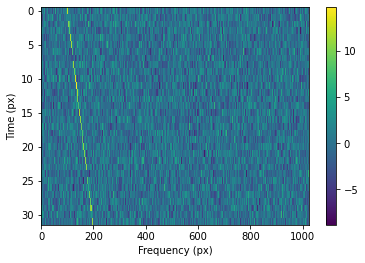

In [185]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6000*u.MHz,
                  ascending=False)
noise = frame.add_noise(x_mean=0, x_std=2, noise_type='gaussian')
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(100),
                                            drift_rate=frame.get_drift_rate(100, 200)),
                          stg.constant_t_profile(level=10),
                          stg.box_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

frame.render()
frame.save_fil('test.fil')
wf = bl.Waterfall('test.fil')
wf.header

In [134]:
int(np.round((6001e6 - frame.fmin)/frame.df))

358937

In [136]:
frame.get_index(6001e6)

358937

In [137]:
frame.fmin + frame.df * 665

5999998999.759556

In [156]:
frame.get_index(frame.fs) 

array([   0,    1,    2, ..., 1021, 1022, 1023])

In [157]:
frame.get_frequency(np.arange(1024))

array([5.99999714e+09, 5.99999714e+09, 5.99999715e+09, ...,
       5.99999999e+09, 6.00000000e+09, 6.00000000e+09])

In [159]:
frame.fs[0]

5999997141.771019

In [160]:
frame.get_frequency(0)

5999997141.771019

In [164]:
a, b=np.sort([2,1])
a, b

(1, 2)

In [190]:
a = stg.split_waterfall_generator('test.fil', 256)
for b in a:
    print(b)

blimpy.io.base_reader INFO     Skipping loading data ...
Waterfall data: test.fil
0.001430511474609375 0.00286102294921875 1024
Waterfall data: test.fil
0.0021457672119140625 0.00286102294921875 1024
Waterfall data: test.fil
0.00286102294921875 0.00286102294921875 1024
Waterfall data: test.fil
0.0035762786865234375 0.00286102294921875 1024


In [175]:
b.grab_data()[1].shape

(32, 255)

In [202]:
frame = stg.Frame(fchans=1024*u.pixel,
                      tchans=32*u.pixel,
                      df=2.7939677238464355*u.Hz,
                      dt=18.25361108*u.s,
                      fch1=6095.214842353016*u.MHz)
frame.get_frequency(200)

6095212542.91758

In [203]:
frame1 = stg.Frame(fchans=1024*u.pixel,
                      tchans=32*u.pixel,
                      df=2.7939677238464355*u.Hz,
                      dt=18.25361108*u.s,
                      fch1=6095211984.124035,
                      ascending=True)
frame1.get_frequency(200)

6095212542.91758

In [199]:
frame.fmax, frame1.fmax

(6095214842.353016, 6095214842.353016)

In [207]:
frame.fmin, frame1.fmin

(6095211984.124035, 6095211984.124035)

In [200]:
frame.fch1, frame1.fch1

(6095214842.353016, 6095211984.124035)

In [208]:
frame.fs[1]

6095211986.918002

In [209]:
frame1.fs[1]

6095211986.918003

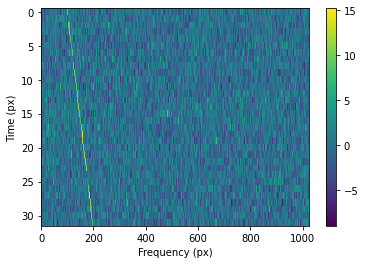

In [226]:
np.random.seed(42)
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6000*u.MHz)
noise = frame.add_noise(x_mean=0, x_std=2, noise_type='gaussian')
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(100),
                                            drift_rate=frame.get_drift_rate(100, 200)),
                          stg.constant_t_profile(level=10),
                          stg.box_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

frame.render()

In [227]:
data = frame.data

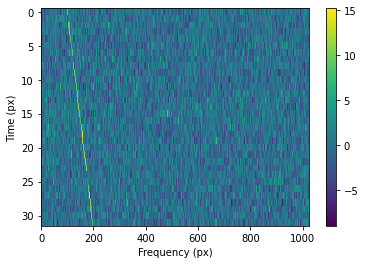

In [230]:
np.random.seed(42)
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.25361108*u.s,
                  fch1=6000*u.MHz)
noise = frame.add_noise(x_mean=0, x_std=2, noise_type='gaussian')
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(100),
                                            drift_rate=frame.get_drift_rate(100, 200)),
                          stg.constant_t_profile(level=10),
                          stg.box_f_profile(width=10*u.Hz),
                          stg.constant_bp_profile(level=1))

frame.render()

In [231]:
np.allclose(frame.data, data)

True